In [ ]:
# Looking at Grad_Admissions.csv, we will be predicting the chance of graduate
# admission using multiple linear regression. Specifically, we will be computing
# the normal equation X^TXw = X^Ty and solving the system of linear equations
# using QR decomposition with Givens roation.

# We will only use basic python and libraries (pandas, numpy, scikit-learn and matplotlib)



In [1]:
# Loading in our libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Loading in our data

data = pd.read_csv('/Users/michaelguel/Desktop/ProjectData/Grad_Admission.csv')

data

,GRE,TOEFL,University_Rating,CGPA,Research_Experience,Chance_of_Admit
0,337,118,4,9.65,1,0.92
1,324,107,4,8.87,1,0.76
2,316,104,3,8.00,1,0.72
3,322,110,3,8.67,1,0.80
4,314,103,2,8.21,0,0.65
...,...,...,...,...,...,...
195,307,107,2,8.52,1,0.78
196,306,105,2,8.26,0,0.73
197,310,106,2,8.33,0,0.73
198,311,104,3,8.43,0,0.70


In [90]:
# Looking at our data, we can see that standardizing will be important to center
# our predictors around zero. So we create a function to do so. 

def standardize(arr):
    result = arr.copy()
    m = arr.sum(axis=0)/arr.shape[0]
    s = np.sqrt(np.sum((arr - m)**2, axis=0)/(arr.shape[0]-1))
    return (result - m)/s

In [110]:
# Let's split our data into predictors and target, then call our function.

y = data.iloc[:,5]
Y = standardize(y)
x = data.iloc[:,0:5]
X = standardize(x)
X

,GRE,TOEFL,University_Rating,CGPA,Research_Experience
0,1.631094,1.606994,0.611340,1.642815,0.866380
1,0.530148,-0.204167,0.611340,0.392368,0.866380
2,-0.147357,-0.698120,-0.231887,-1.002362,0.866380
3,0.360771,0.289786,-0.231887,0.071740,0.866380
4,-0.316734,-0.862771,-1.075114,-0.665703,-1.148457
...,...,...,...,...,...
195,-0.909551,-0.204167,-1.075114,-0.168730,0.866380
196,-0.994239,-0.533469,-1.075114,-0.585546,-1.148457
197,-0.655486,-0.368818,-1.075114,-0.473326,-1.148457
198,-0.570798,-0.698120,-0.231887,-0.313013,-1.148457


In [111]:
# # We need to add a column of 1s for our intercept term

onecol = np.ones(len(X['GRE']))
X = np.column_stack([X,onecol])

X

array([[ 1.63109356,  1.60699352,  0.61133955,  1.64281534,  0.86637984,
         1.        ],
       [ 0.53014775, -0.20416721,  0.61133955,  0.39236795,  0.86637984,
         1.        ],
       [-0.14735736, -0.69812014, -0.23188741, -1.00236183,  0.86637984,
         1.        ],
       ...,
       [-0.6554862 , -0.36881819, -1.07511438, -0.4733264 , -1.148457  ,
         1.        ],
       [-0.57079806, -0.69812014, -0.23188741, -0.31301263, -1.148457  ,
         1.        ],
       [-0.40142178, -0.20416721, -0.23188741,  0.10380316, -1.148457  ,
         1.        ]])

In [120]:
# Using sklearn, we split our data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print('Training set size for predictors:', X_train.shape)
print('Test set size for predictors:', X_test.shape)

Training set size for predictors: (134, 6)
Test set size for predictors: (66, 6)


In [140]:
# Here we have create our function for QR decomposition with Givens Rotation

def QR(A):
    m,n = A.shape
    Q = np.eye(m)
    R = A
    for j in range(0,n-1):
        for i in range(m-1,j,-1):
            sin = -((R[i,j]) / (np.sqrt((R[i,j]**2) + (R[i-1,j]**2))))
            cos = (R[i-1,j]) / (np.sqrt((R[i,j]**2)+(R[i-1,j]**2)))
            G = np.eye(m)
            G[i-1,i-1] = cos
            G[i-1,i] = -sin
            G[i,i-1] = sin
            G[i,i] = cos
            R = np.dot(G,R)
            Q = np.dot(Q,G.T)
            
    return (Q, R)

#############################################################
# Check if decomposition is performing as expected
#############################################################

A = np.array([[1.0,2.1,3.3,4.0],[1.2,2,1.5,3.1],[1.1,1.7,2.6,2.1],[4.1,1.4,1.5,1]])
print('A:')
print(A)

[Q,R] = QR(A)
print('Q:')
print(Q)
print('R:')
print(R)
print('Q x R:')
print(np.matmul(Q,R))

A:
[[1.  2.1 3.3 4. ]
 [1.2 2.  1.5 3.1]
 [1.1 1.7 2.6 2.1]
 [4.1 1.4 1.5 1. ]]
Q:
[[ 0.22107884  0.61100537  0.47092412 -0.59668003]
 [ 0.26529461  0.52253078 -0.81027328 -0.00612908]
 [ 0.24318673  0.42496714  0.34762778  0.79963621]
 [ 0.90642326 -0.41597711  0.02902762 -0.06721095]]
R:
[[ 4.52327315e+00  2.67726480e+00  3.11942249e+00  3.12384407e+00]
 [ 9.79027348e-18  2.46824901e+00  3.28106278e+00  4.54032076e+00]
 [-3.02570841e-18 -1.85062188e-16  1.28601336e+00  1.30895290e-01]
 [ 9.73462185e-17  9.98045243e-17  8.53137993e-17 -7.93695179e-01]]
Q x R:
[[1.  2.1 3.3 4. ]
 [1.2 2.  1.5 3.1]
 [1.1 1.7 2.6 2.1]
 [4.1 1.4 1.5 1. ]]


In [141]:
# Here we define our fuction for back subsitution

def backsubstitution(U, b):
    o = U.copy()
    a = b.copy()
    init = len(a)
    xxx = np.zeros(init).reshape(init,1)
    for i in range(init-1, -1, -1):
        x = a[i]
        for j in range(init-1,i,-1):
            x -= xxx[j]*o[i,j]
        xxx[i] = x/o[i,i]
    return(xxx)

#############################################################
# Check if backsubstituion is peforming as expected
#############################################################

U = np.array([[1.0,2.0,3.0],[0,1,-1],[0,0,2]])
b = np.array([3.1,-2.2,1]).reshape(3,1)

w = backsubstitution(U,b)

print('w=', w)
print('\nU x w =', np.matmul(U,w)) 
print('\nb =', b) 

w= [[ 5. ]
 [-1.7]
 [ 0.5]]

U x w = [[ 3.1]
 [-2.2]
 [ 1. ]]

b = [[ 3.1]
 [-2.2]
 [ 1. ]]


In [142]:
# Here we define our train and predict using matrix multiplication

def mlr_train(Xtrain, Ytrain):
    A = np.dot(Xtrain.T, Xtrain)
    b = np.dot(Xtrain.T, Ytrain)
    [Q,R] = QR(A)
    print(Q)
    print(b)
    b = np.dot(Q.T, b)
    return backsubstitution(R,b)
    
def mlr_predict(Xtest, w):
    return np.dot(Xtest, w)
    
###############################################
# Check our results
###############################################
w = mlr_train(X_train,Y_train)

predvalues = mlr_predict(X_test,w)

print('Regression coefficients: ', w[:-1])
print('Model Intercept: ',w[-1])

[[ 0.58114318 -0.71031769 -0.12791467 -0.31778314 -0.19662135 -0.04139009]
 [ 0.49805262  0.66480333 -0.42646842 -0.33697346 -0.11513077  0.03603608]
 [ 0.34128565  0.20718741  0.89058315 -0.20103565 -0.01172636  0.08310412]
 [ 0.45271707  0.06431001  0.01292981  0.84433794 -0.23596831 -0.14885126]
 [ 0.30206423 -0.05211518 -0.06831955  0.11029963  0.9427346   0.02142692]
 [ 0.03930329 -0.06088444 -0.06155843  0.14133246 -0.05931168  0.98359858]]
[ 95.98588144  97.87163335  82.89816307 101.28319132  69.84547214
  11.24273595]
Regression coefficients:  [[0.0847334 ]
 [0.17968278]
 [0.11506009]
 [0.47231964]
 [0.11911454]]
Model Intercept:  [0.03008196]


In [143]:
# Let's check against sklearn package and see if our decomposition yields the same results

from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

print('Regression coefficients: ', regr.coef_[:-1]) 
print('Model intercept:', regr.intercept_)

Regression coefficients:  [0.0847334  0.17968278 0.11506009 0.47231964 0.11911454]
Model intercept: 0.030081960644316702


In [144]:
# Let's calculate the RMSE

N = len(predvalues)

predmat = predvalues

ytest = np.array(Y_test).reshape(N,1)

RMSE = np.sqrt(sum((ytest - predmat)**2)/N)

Text(0, 0.5, 'Predicted value')

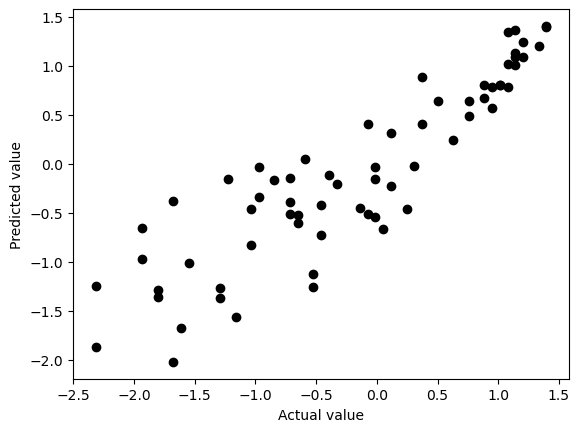

In [145]:
# Plot our actuals and predicted

import matplotlib.pyplot as plt
%matplotlib inline

predvalues = mlr_predict(X_test, w)


plt.figure()
plt.scatter(Y_test,predvalues,color='black')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

In [131]:
print('Root mean-square error:',RMSE)

Root mean-square error: [0.47785472]
